Loads the cats_vs_dogs dataset, splits it into training and validation sets, and preprocesses the images by resizing them to a consistent shape (let's say 160x160 pixels) for input into a neural network

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
(ds_train, ds_validation), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

# Define the size to which you want to resize the images
IMG_SIZE = 160

# Define the preprocessing function
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 255.0)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Define the augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    # Add more transformations as needed
    return image, label

# Apply the preprocess function to both training and validation datasets
ds_train = ds_train.map(preprocess)
ds_validation = ds_validation.map(preprocess)

# Apply the augmentation only to the training dataset
ds_train = ds_train.map(augment)

# Shuffle, batch, and prefetch the training dataset for optimal training speed
BUFFER_SIZE = 1000
BATCH_SIZE = 16

ds_train = ds_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_validation = ds_validation.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Now, ds_train and ds_validation are ready to be used in a model

In [6]:
from keras.src.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['acc']
)

/home/fox_white/PycharmProjects/numeric/venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
history = model.fit(
    ds_train,  # Training dataset
    steps_per_epoch=20,  # Number of steps to run per epoch
    epochs=50,  # Number of training epochs, suggested range is [10, 50] or more if the training is fast
    validation_data=ds_validation,  # Validation dataset
    validation_steps=10,  # Number of steps to run for validation
    verbose=1
)

Epoch 1/50


2023-12-01 17:57:51.729141: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - 3s 47ms/step - loss: 0.7172 - acc: 0.4781 - val_loss: 0.6994 - val_acc: 0.4563
Epoch 2/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6996 - acc: 0.4792

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6963 - acc: 0.4812 - val_loss: 0.7138 - val_acc: 0.4313
Epoch 3/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.7011 - acc: 0.5000

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6979 - acc: 0.4812 - val_loss: 0.6795 - val_acc: 0.6062
Epoch 4/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6871 - acc: 0.5500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6847 - acc: 0.5406 - val_loss: 0.6929 - val_acc: 0.5188
Epoch 5/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6858 - acc: 0.5208

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6757 - acc: 0.5719 - val_loss: 0.7048 - val_acc: 0.5312
Epoch 6/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.7076 - acc: 0.5000

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6651 - acc: 0.5906 - val_loss: 0.6691 - val_acc: 0.5875
Epoch 7/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.7172 - acc: 0.4375

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6512 - acc: 0.6062 - val_loss: 0.6200 - val_acc: 0.6500
Epoch 8/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6573 - acc: 0.5833

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6640 - acc: 0.6031 - val_loss: 0.6349 - val_acc: 0.6438
Epoch 9/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6781 - acc: 0.5625

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6408 - acc: 0.6375 - val_loss: 0.6179 - val_acc: 0.5813
Epoch 10/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6711 - acc: 0.5750

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6670 - acc: 0.6125 - val_loss: 0.6276 - val_acc: 0.6313
Epoch 11/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5880 - acc: 0.6250

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6093 - acc: 0.6781 - val_loss: 0.6020 - val_acc: 0.6875
Epoch 12/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6731 - acc: 0.5625

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6334 - acc: 0.6406 - val_loss: 0.5802 - val_acc: 0.7250
Epoch 13/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6420 - acc: 0.5417

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6102 - acc: 0.6625 - val_loss: 0.5787 - val_acc: 0.7125
Epoch 14/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6167 - acc: 0.6875

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6166 - acc: 0.6562 - val_loss: 0.5691 - val_acc: 0.7063
Epoch 15/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.7096 - acc: 0.6250

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6324 - acc: 0.6719 - val_loss: 0.5673 - val_acc: 0.7063
Epoch 16/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5443 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6036 - acc: 0.6187 - val_loss: 0.5792 - val_acc: 0.7500
Epoch 17/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6270 - acc: 0.6667

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


15/20 [=====================>........] - ETA: 0s - loss: 0.6220 - acc: 0.6667

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6160 - acc: 0.6750 - val_loss: 0.6189 - val_acc: 0.6250
Epoch 18/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5840 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.6267 - acc: 0.6594 - val_loss: 0.5474 - val_acc: 0.7000
Epoch 19/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6047 - acc: 0.7000

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6148 - acc: 0.6438 - val_loss: 0.5562 - val_acc: 0.7563
Epoch 20/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5199 - acc: 0.8542

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


19/20 [===========================>..] - ETA: 0s - loss: 0.6248 - acc: 0.6711

20/20 [==============================] - 1s 41ms/step - loss: 0.6225 - acc: 0.6719 - val_loss: 0.5890 - val_acc: 0.7125
Epoch 21/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6025 - acc: 0.6125

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


19/20 [===========================>..] - ETA: 0s - loss: 0.6276 - acc: 0.6447

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6266 - acc: 0.6469 - val_loss: 0.5583 - val_acc: 0.7250
Epoch 22/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.5468 - acc: 0.7750

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5902 - acc: 0.6969 - val_loss: 0.5441 - val_acc: 0.7188
Epoch 23/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5929 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5621 - acc: 0.7219 - val_loss: 0.5510 - val_acc: 0.7563
Epoch 24/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.5502 - acc: 0.6625

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5979 - acc: 0.6469 - val_loss: 0.6019 - val_acc: 0.6625
Epoch 25/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6496 - acc: 0.6458

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6071 - acc: 0.6687 - val_loss: 0.5562 - val_acc: 0.7750
Epoch 26/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5672 - acc: 0.7500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5580 - acc: 0.7094 - val_loss: 0.6085 - val_acc: 0.6313
Epoch 27/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6069 - acc: 0.6500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.6083 - acc: 0.6687 - val_loss: 0.5874 - val_acc: 0.7250
Epoch 28/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5939 - acc: 0.6667

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


19/20 [===========================>..] - ETA: 0s - loss: 0.5815 - acc: 0.6612

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5750 - acc: 0.6687 - val_loss: 0.5733 - val_acc: 0.6812
Epoch 29/50
20/20 [==============================] - 1s 41ms/step - loss: 0.5699 - acc: 0.6969 - val_loss: 0.5258 - val_acc: 0.7312
Epoch 30/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5644 - acc: 0.7083

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5659 - acc: 0.7094 - val_loss: 0.5089 - val_acc: 0.7563
Epoch 31/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5147 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5732 - acc: 0.6844 - val_loss: 0.5812 - val_acc: 0.7125
Epoch 32/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.4996 - acc: 0.8542

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5418 - acc: 0.7406 - val_loss: 0.5338 - val_acc: 0.7000
Epoch 33/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.5735 - acc: 0.6750

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5659 - acc: 0.7031 - val_loss: 0.5446 - val_acc: 0.7625
Epoch 34/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.6239 - acc: 0.6375

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5956 - acc: 0.6906 - val_loss: 0.5403 - val_acc: 0.7625
Epoch 35/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6173 - acc: 0.6667

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5934 - acc: 0.6969 - val_loss: 0.6127 - val_acc: 0.6625
Epoch 36/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5962 - acc: 0.7708

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5627 - acc: 0.7344 - val_loss: 0.5675 - val_acc: 0.6938
Epoch 37/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.5523 - acc: 0.7750

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5764 - acc: 0.7031 - val_loss: 0.5668 - val_acc: 0.7125
Epoch 38/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.5866 - acc: 0.7000

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5548 - acc: 0.7125 - val_loss: 0.5121 - val_acc: 0.7563
Epoch 39/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5234 - acc: 0.7500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5611 - acc: 0.7281 - val_loss: 0.5049 - val_acc: 0.7375
Epoch 40/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6253 - acc: 0.6458

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5697 - acc: 0.7125 - val_loss: 0.5006 - val_acc: 0.7937
Epoch 41/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6395 - acc: 0.6250

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5254 - acc: 0.7281 - val_loss: 0.4909 - val_acc: 0.7875
Epoch 42/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.4434 - acc: 0.8125

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5436 - acc: 0.7344 - val_loss: 0.5332 - val_acc: 0.7312
Epoch 43/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.5331 - acc: 0.7708

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5049 - acc: 0.7406 - val_loss: 0.4980 - val_acc: 0.7812
Epoch 44/50
 5/20 [======>.......................] - ETA: 0s - loss: 0.4872 - acc: 0.7500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5457 - acc: 0.7469 - val_loss: 0.5160 - val_acc: 0.7063
Epoch 45/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6471 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5672 - acc: 0.7031 - val_loss: 0.5335 - val_acc: 0.7688
Epoch 46/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.4728 - acc: 0.7500

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5724 - acc: 0.7188 - val_loss: 0.5291 - val_acc: 0.7563
Epoch 47/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.4944 - acc: 0.7292

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 40ms/step - loss: 0.5351 - acc: 0.7094 - val_loss: 0.6533 - val_acc: 0.6000
Epoch 48/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6337 - acc: 0.6458

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5260 - acc: 0.7563 - val_loss: 0.5720 - val_acc: 0.6625
Epoch 49/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6043 - acc: 0.6667

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


19/20 [===========================>..] - ETA: 0s - loss: 0.5505 - acc: 0.7138

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5364 - acc: 0.7281 - val_loss: 0.6453 - val_acc: 0.6000
Epoch 50/50
 3/20 [===>..........................] - ETA: 0s - loss: 0.6177 - acc: 0.6667

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 41ms/step - loss: 0.5608 - acc: 0.7250 - val_loss: 0.4801 - val_acc: 0.8000


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


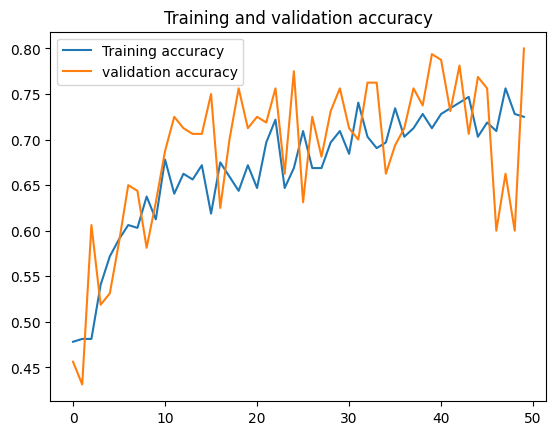

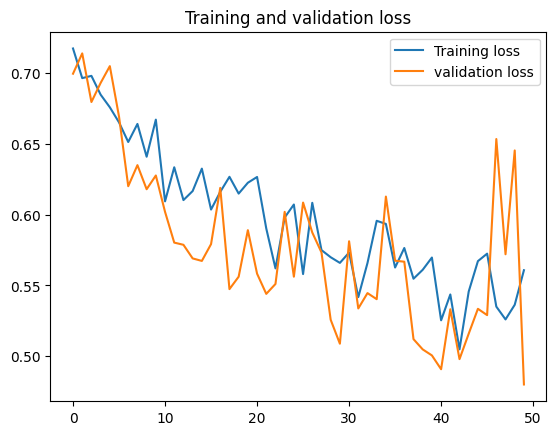

In [8]:
from matplotlib import pyplot as plt

model.save('model.h5')
# 得到精度和损失值
acc = history.history['acc'] # train_acc
val_acc = history.history['val_acc'] # val_acc
loss = history.history['loss'] # train_loss
val_loss = history.history['val_loss'] # val_loss
epochs = range(len(acc)) # 得到迭代次数
# 绘制精度曲线
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(('Training accuracy', 'validation accuracy'))
plt.figure()
# 绘制损失曲线
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(('Training loss', 'validation loss'))
plt.title('Training and validation loss')
plt.show()